## Interface Agents

Interface agents address tasks by interacting with a user interface. They can be used to build systems that address tasks that are not easily accessible through an API.  


This notebook demonstrates how the `InterfaceAgent` package to address entire tasks by interacting with a user interface. The package is built on top of the `Playwright` library, which provides a high-level API to interact with web pages.





In [1]:
from interfaceagent import WebBrowser, Planner, OpenAIPlannerModel 

In [2]:
browser = WebBrowser(start_url="http://google.com/",headless=False)
model = OpenAIPlannerModel(model="gpt-4o-mini-2024-07-18")
task = "What is the website for the Manning Book - Multi-Agent Systems with AutoGen. Navigate to the book website and find the author of the book." 
planner = Planner(model=model, web_browser=browser, task=task)
result = await planner.run(task=task)

2024-09-05 21:34:27.376 | INFO     | interfaceagent.interface.planner:run:254 - WebBrowser not initialized. Initializing now.
2024-09-05 21:34:29.950 | INFO     | interfaceagent.interface.webbrowser:initialize:39 - WebBrowser successfully initialized.
2024-09-05 21:34:30.781 | INFO     | interfaceagent.interface.planner:generate_plan:58 - High-level plan: ["Search for 'Multi-Agent Systems with AutoGen Manning Book' on Google", 'Look for the official Manning Publications website link in the search results', "Navigate to the Manning book page for 'Multi-Agent Systems with AutoGen'", "Locate the author's name on the book page"]
2024-09-05 21:34:32.042 | INFO     | interfaceagent.interface.webbrowser:get_interactive_elements:167 - Total interactive elements found: 20
2024-09-05 21:34:33.355 | INFO     | interfaceagent.interface.planner:next_actions:106 - Next actions: [{'action': 'type', 'selector': '#APjFqb', 'selector_type': 'css_selector', 'value': 'Multi-Agent Systems with AutoGen Mann

In [12]:
print(result)

{'task': 'What is the website for the Manning Book - Multi-Agent Systems with AutoGen. Navigate to the book website and find the author of the book.', 'page_content': {'content': 'Accessibility Links\nSkip to main content\nAccessibility help\nAccessibility feedback\nSign in\nFilters and Topics\nAll\nShopping\nImages\nVideos\nForums\nBooks\nWeb\nMore\nTools\nSearch Results\n\nMulti-Agent Systems with AutoGen\nManning\nhttps://www.manning.com › books › multi-agent-syste...\nMulti-Agent Systems with AutoGen teaches you how to build collaborative teams of AI agents that can tackle tasks far beyond the capabilities of the standard\xa0...\n$23.99 · \u200e30-day returns\n\nAnnouncing A New Manning Book — Multi-Agent Systems ...\nMedium\xa0·\xa0Victor Dibia\n70+ likes · 1 month ago\nIn this book, you\'ll learn about: Core components of multi-agent systems and their implementation using tools like AutoGen and AutoGen Studio\xa0...\nVideos\n4:01\nAutomate What Once Was Impossible to Automate\nYo


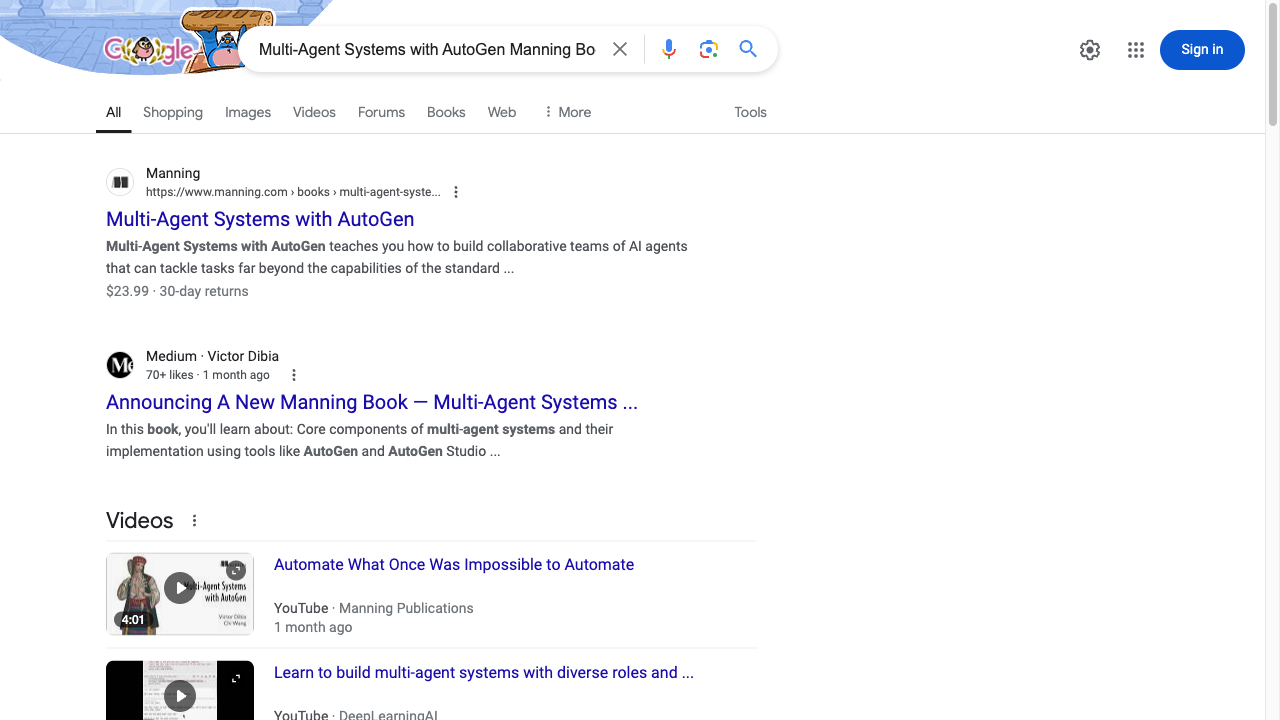

In [3]:
import base64
from IPython.display import HTML

def display_image(file_path):
    # Read the image file
    with open(file_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode()
    
    # Create the HTML to display the image
    html = f'<img src="data:image/png;base64,{encoded_string}" />'
    
    # Display the HTML
    return HTML(html)

# Usage
display_image('screenshot.png')

## Manually Stepping Through the Task

We accomplish this through the following: 

- Initialize a browser object 
- Use the planner to plan the next steps to take
- Manually execute each step and view responses 

In [9]:
browser = WebBrowser(start_url="http://bing.com/",headless=False)
model = OpenAIPlannerModel(model="gpt-4o-mini-2024-07-18")
task = "What is the website for the Manning Book - Multi-Agent Systems with AutoGen" 

planner = Planner(model=model, web_browser=browser, task=task)

next_actions = await planner.next_actions() 
print(next_actions) 

2024-09-05 20:02:14.994 | INFO     | interfaceagent.interface.planner:next_actions:70 - WebBrowser not initialized. Initializing now.
2024-09-05 20:02:16.373 | INFO     | interfaceagent.interface.webbrowser:initialize:39 - WebBrowser successfully initialized.
2024-09-05 20:02:17.197 | INFO     | interfaceagent.interface.webbrowser:get_interactive_elements:167 - Total interactive elements found: 10
2024-09-05 20:02:18.438 | INFO     | interfaceagent.interface.planner:next_actions:106 - Next actions: [{'action': 'type', 'selector': '#sb_form_q', 'selector_type': 'css_selector', 'value': 'Multi-Agent Systems with AutoGen', 'url': ''}, {'action': 'press', 'selector': '#sb_form_q', 'selector_type': 'css_selector', 'value': 'Enter', 'url': ''}]


[{'action': 'type', 'selector': '#sb_form_q', 'selector_type': 'css_selector', 'value': 'Multi-Agent Systems with AutoGen', 'url': ''}, {'action': 'press', 'selector': '#sb_form_q', 'selector_type': 'css_selector', 'value': 'Enter', 'url': ''}]


2024-09-05 20:02:28.435 | INFO     | interfaceagent.interface.planner:execute_action:152 - Executing: action='type' selector='#sb_form_q' value='Multi-Agent Systems with AutoGen'



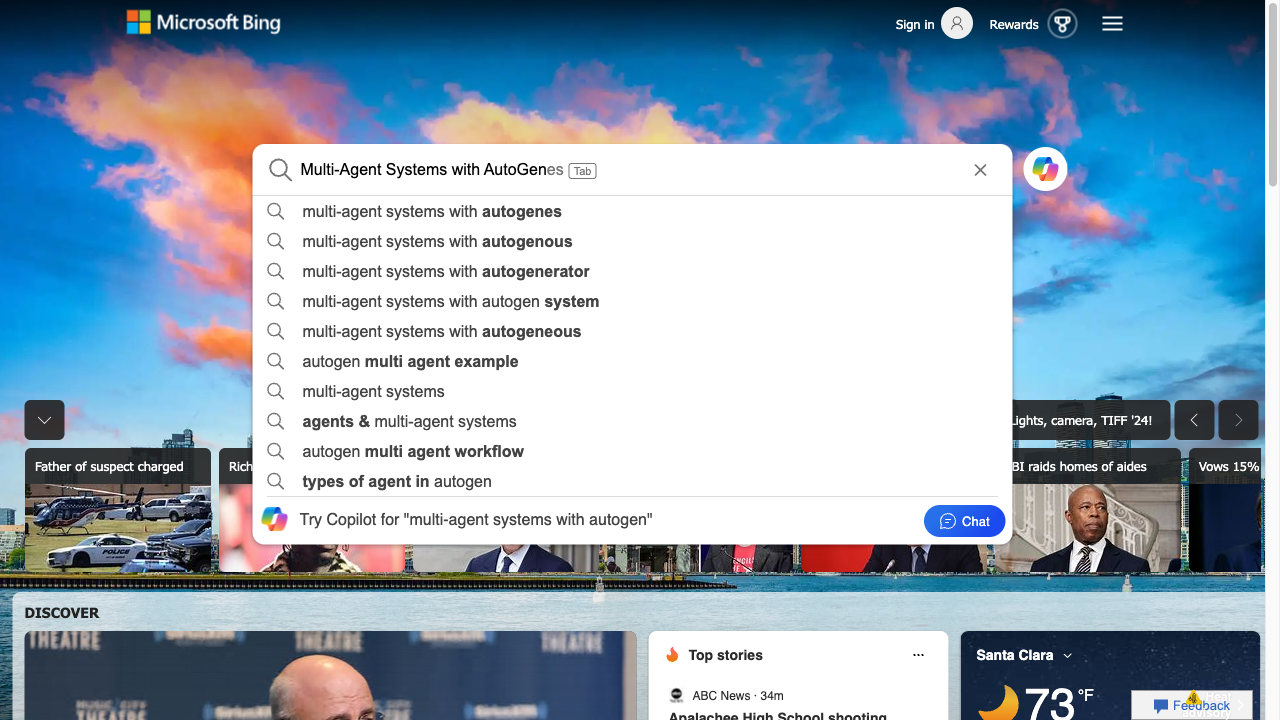

In [10]:
await planner.execute_action(next_actions[0]) 
await browser.screenshot("screenshot.png")
display_image('screenshot.png')


2024-09-05 20:02:35.214 | INFO     | interfaceagent.interface.planner:execute_action:152 - Executing: action='type' selector='#sb_form_q' value='Multi-Agent Systems with AutoGen'
2024-09-05 20:02:35.390 | INFO     | interfaceagent.interface.planner:execute_action:152 - Executing: action='press' selector='#sb_form_q' value='Enter'



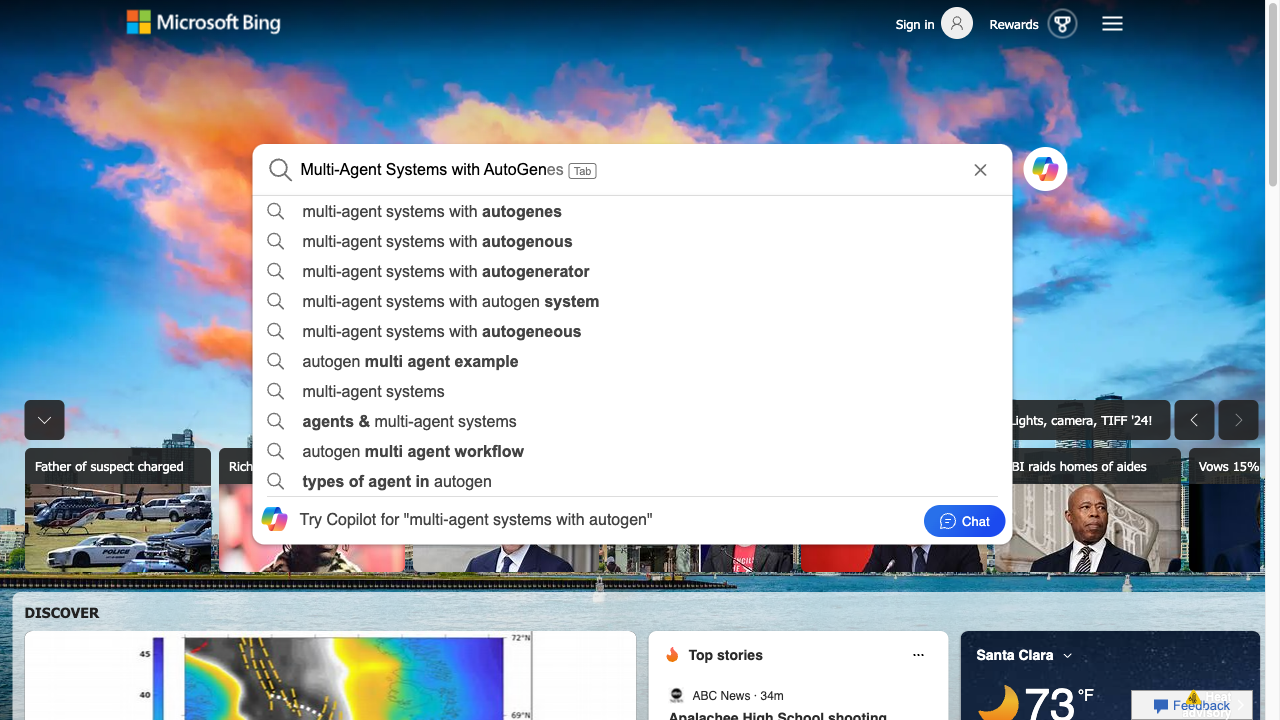

In [11]:
await planner.execute_action(next_actions[0]) 
await browser.screenshot("screenshot.png")
await planner.execute_action(next_actions[1])
display_image('screenshot.png')



In [8]:
await browser.close()

2024-09-05 20:02:11.624 | INFO     | interfaceagent.interface.webbrowser:close:317 - WebBrowser successfully closed and resources cleaned up.
